# 순차적 모델

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model = keras.Sequential()
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

# 위 두 코드는 동일한 모델을 만듦

In [7]:
# 아직은 가중치가 없음
model.weights

[]

In [8]:
# summary는 호출되지만 가중치가 없음
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
# 모델 빌드 해야 가중치가 생성됨 
model.build(input_shape=(None, 3))
model.weights


[<KerasVariable shape=(3, 64), dtype=float32, path=sequential_4/dense_7/kernel>,
 <KerasVariable shape=(64,), dtype=float32, path=sequential_4/dense_7/bias>,
 <KerasVariable shape=(64, 10), dtype=float32, path=sequential_4/dense_8/kernel>,
 <KerasVariable shape=(10,), dtype=float32, path=sequential_4/dense_8/bias>]

In [10]:
# 혹은 input_shape (모델 입력 크기)를 미리 지정하면 됨
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64, activation="relu"))
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │           256 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 256 (1.00 KB)

 Trainable params: 256 (1.00 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# 이름 지정도 가능 
model = keras.Sequential(name="my_example_model")
model.add(layers.Dense(64, activation="relu", name="my_first_layer"))
model.add(layers.Dense(10, activation="softmax", name="my_last_layer"))
model.build((None, 3))
model.summary()

Model: "my_example_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ my_first_layer (Dense)          │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ my_last_layer (Dense)           │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

# 함수형 API

In [16]:
# 간단한 예시 
inputs = keras.Input(shape=(3,), name="my_input")
features = layers.Dense(64, activation="relu")(inputs)
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

# input은 batch 차원이 가변적 (None), 각 샘플의 크기가 (3,)인 2D 텐서를 뜻함
print(inputs.shape), print(inputs.dtype)

(None, 3)
float32


(None, None)

In [17]:
# features는 batch 차원이 가변적이지만, 각 샘플의 크기가 (64,)인 2D 텐서를 뜻함
print(features.shape), print(features.dtype)

(None, 64)
float32


(None, None)

In [2]:
# 다중 입력, 다중 출력 모델
vocabulary_size = 10000
num_tags = 100
num_departments = 4

title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation="relu")(features)

priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
department = layers.Dense(
    num_departments, activation="softmax", name="department")(features)

model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])

In [3]:
# 입력과 타깃 배열 리스트를 전달하여 모델 훈련하기

import numpy as np

num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=1)
model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])
priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - department_accuracy: 0.2336 - loss: 47.6425 - priority_mean_absolute_error: 0.4746
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - department_accuracy: 0.2432 - loss: 44.4945 - priority_mean_absolute_error: 0.5200 
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [4]:
# 입력과 타깃 배열을 딕셔너리로 전달하여 모델 훈련하기

model.compile(optimizer="rmsprop",
              loss={"priority": "mean_squared_error", "department": "categorical_crossentropy"},
              metrics={"priority": ["mean_absolute_error"], "department": ["accuracy"]})
model.fit({"title": title_data, "text_body": text_body_data, "tags": tags_data},
          {"priority": priority_data, "department": department_data},
          epochs=1)
model.evaluate({"title": title_data, "text_body": text_body_data, "tags": tags_data},
               {"priority": priority_data, "department": department_data})
priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - department_accuracy: 0.2534 - loss: 43.3879 - priority_mean_absolute_error: 0.5027 
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - department_accuracy: 0.5699 - loss: 42.9534 - priority_mean_absolute_error: 0.5200 
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


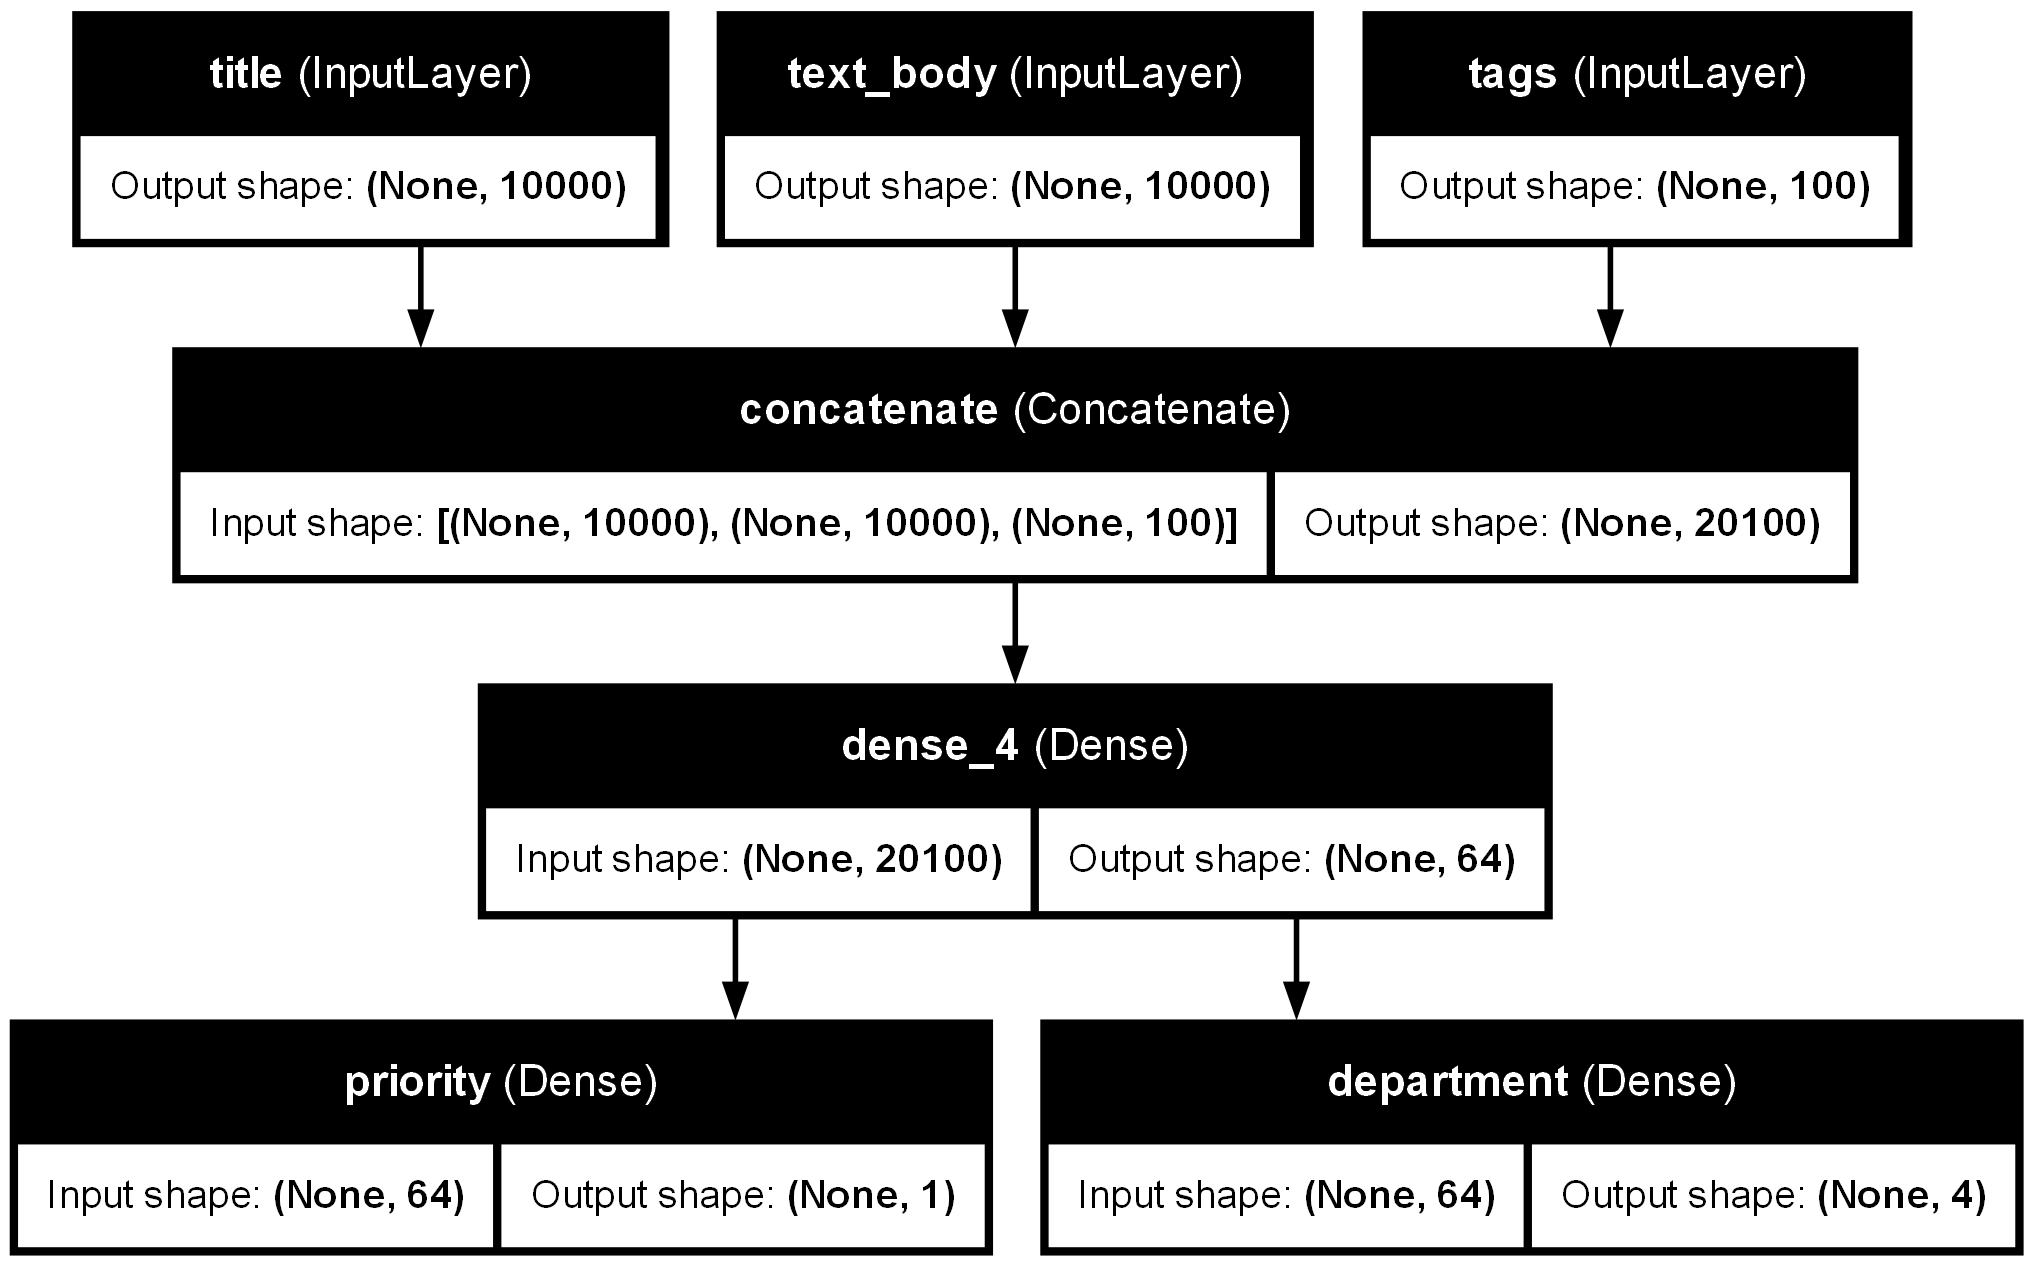

In [6]:
keras.utils.plot_model(model, "ticket_classifier.png", show_shapes=True, show_layer_names=True)

In [10]:
# 레이어 확인
model.layers

[<InputLayer name=title, built=True>,
 <InputLayer name=text_body, built=True>,
 <InputLayer name=tags, built=True>,
 <Concatenate name=concatenate, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=priority, built=True>,
 <Dense name=department, built=True>]

In [11]:
# 레이어 input 확인
model.layers[3].input

[<KerasTensor shape=(None, 10000), dtype=float32, sparse=None, name=title>,
 <KerasTensor shape=(None, 10000), dtype=float32, sparse=None, name=text_body>,
 <KerasTensor shape=(None, 100), dtype=float32, sparse=None, name=tags>]

In [9]:
model.layers[3].output

<KerasTensor shape=(None, 20100), dtype=float32, sparse=False, name=keras_tensor>

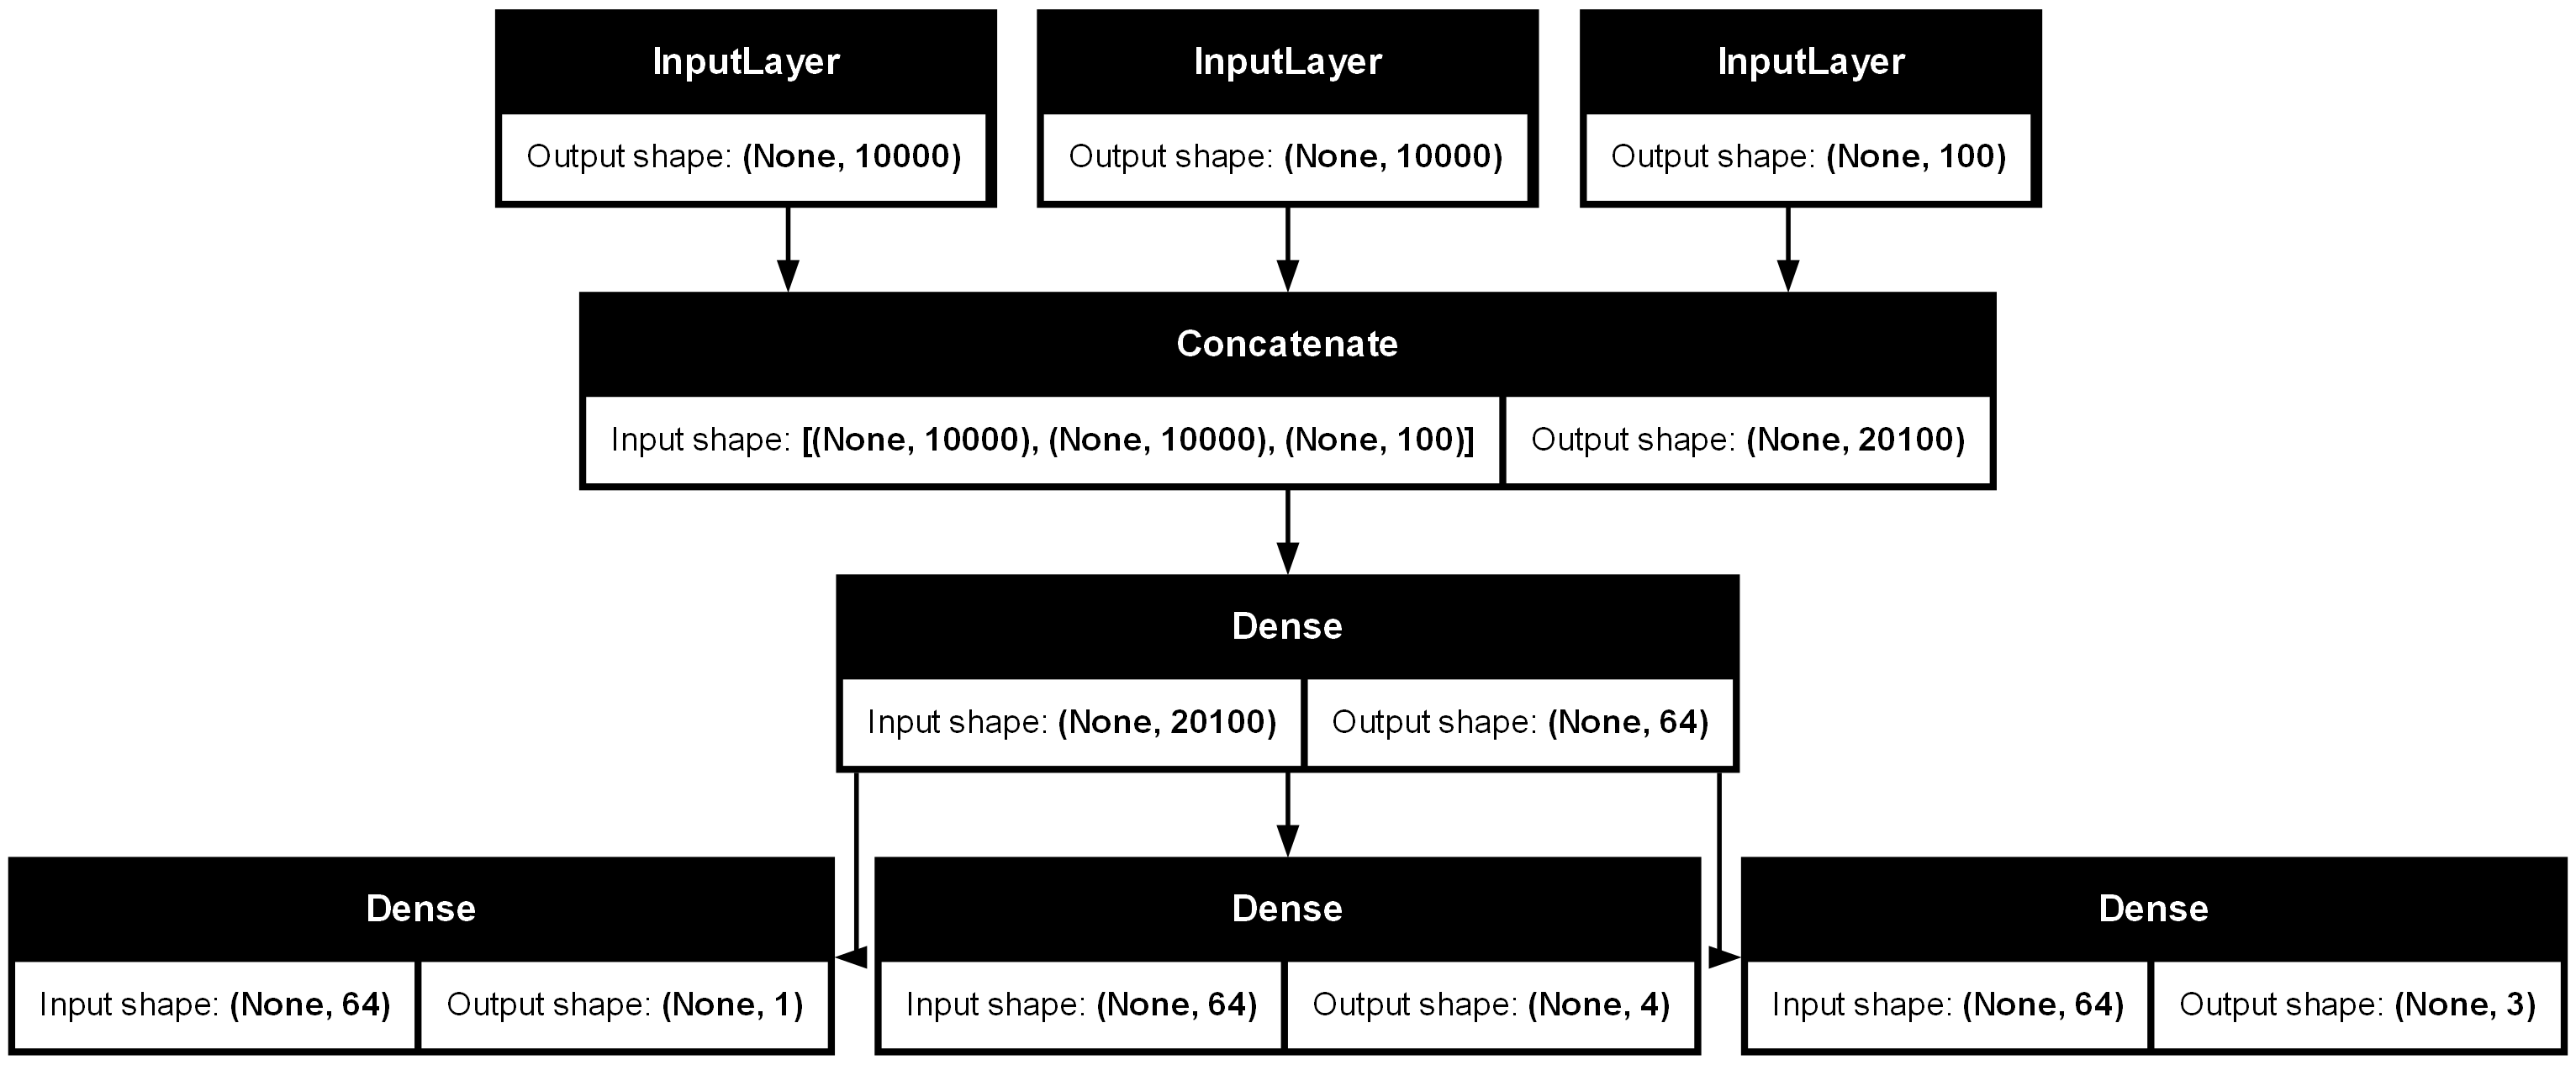

In [12]:
# 중간 층의 출력을 재사용해 새로운 모델 만들기 (추출된 특성을 재사용한다고 보면 됨)
# 이해안됨 다시 보기
# ex) Deep K-means algorithm

features = model.layers[4].output
difficulty = layers.Dense(3, activation="softmax", name="difficulty")(features)

new_model = keras.Model(
    inputs=[title, text_body, tags],
    outputs=[priority, department, difficulty])

keras.utils.plot_model(new_model, "updated_ticket_classifier.png", show_shapes=True)

# subclassing API

In [17]:
# 예제
class CustomerTicketModel(keras.Model):

    def __init__(self, num_departments): # 모델이 사용할 모든 레이어를 생성
        super().__init__()
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation="relu")
        self.priority_scorer = layers.Dense(1, activation="sigmoid")
        self.department_classifier = layers.Dense(
            num_departments, activation="softmax")

    def call(self, inputs): # forward pass를 정의
        title = inputs["title"]
        text_body = inputs["text_body"]
        tags = inputs["tags"]

        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        return priority, department

In [15]:
model = CustomerTicketModel(num_departments=4)

priority, department = model(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

In [16]:
model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit({"title": title_data,
           "text_body": text_body_data,
           "tags": tags_data},
          [priority_data, department_data],
          epochs=1)
model.evaluate({"title": title_data,
                "text_body": text_body_data,
                "tags": tags_data},
               [priority_data, department_data])
priority_preds, department_preds = model.predict({"title": title_data,
                                                  "text_body": text_body_data,
                                                  "tags": tags_data})

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2073 - loss: 33.3454 - mean_absolute_error: 0.4879
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2198 - loss: 18.6889 - mean_absolute_error: 0.4800 
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


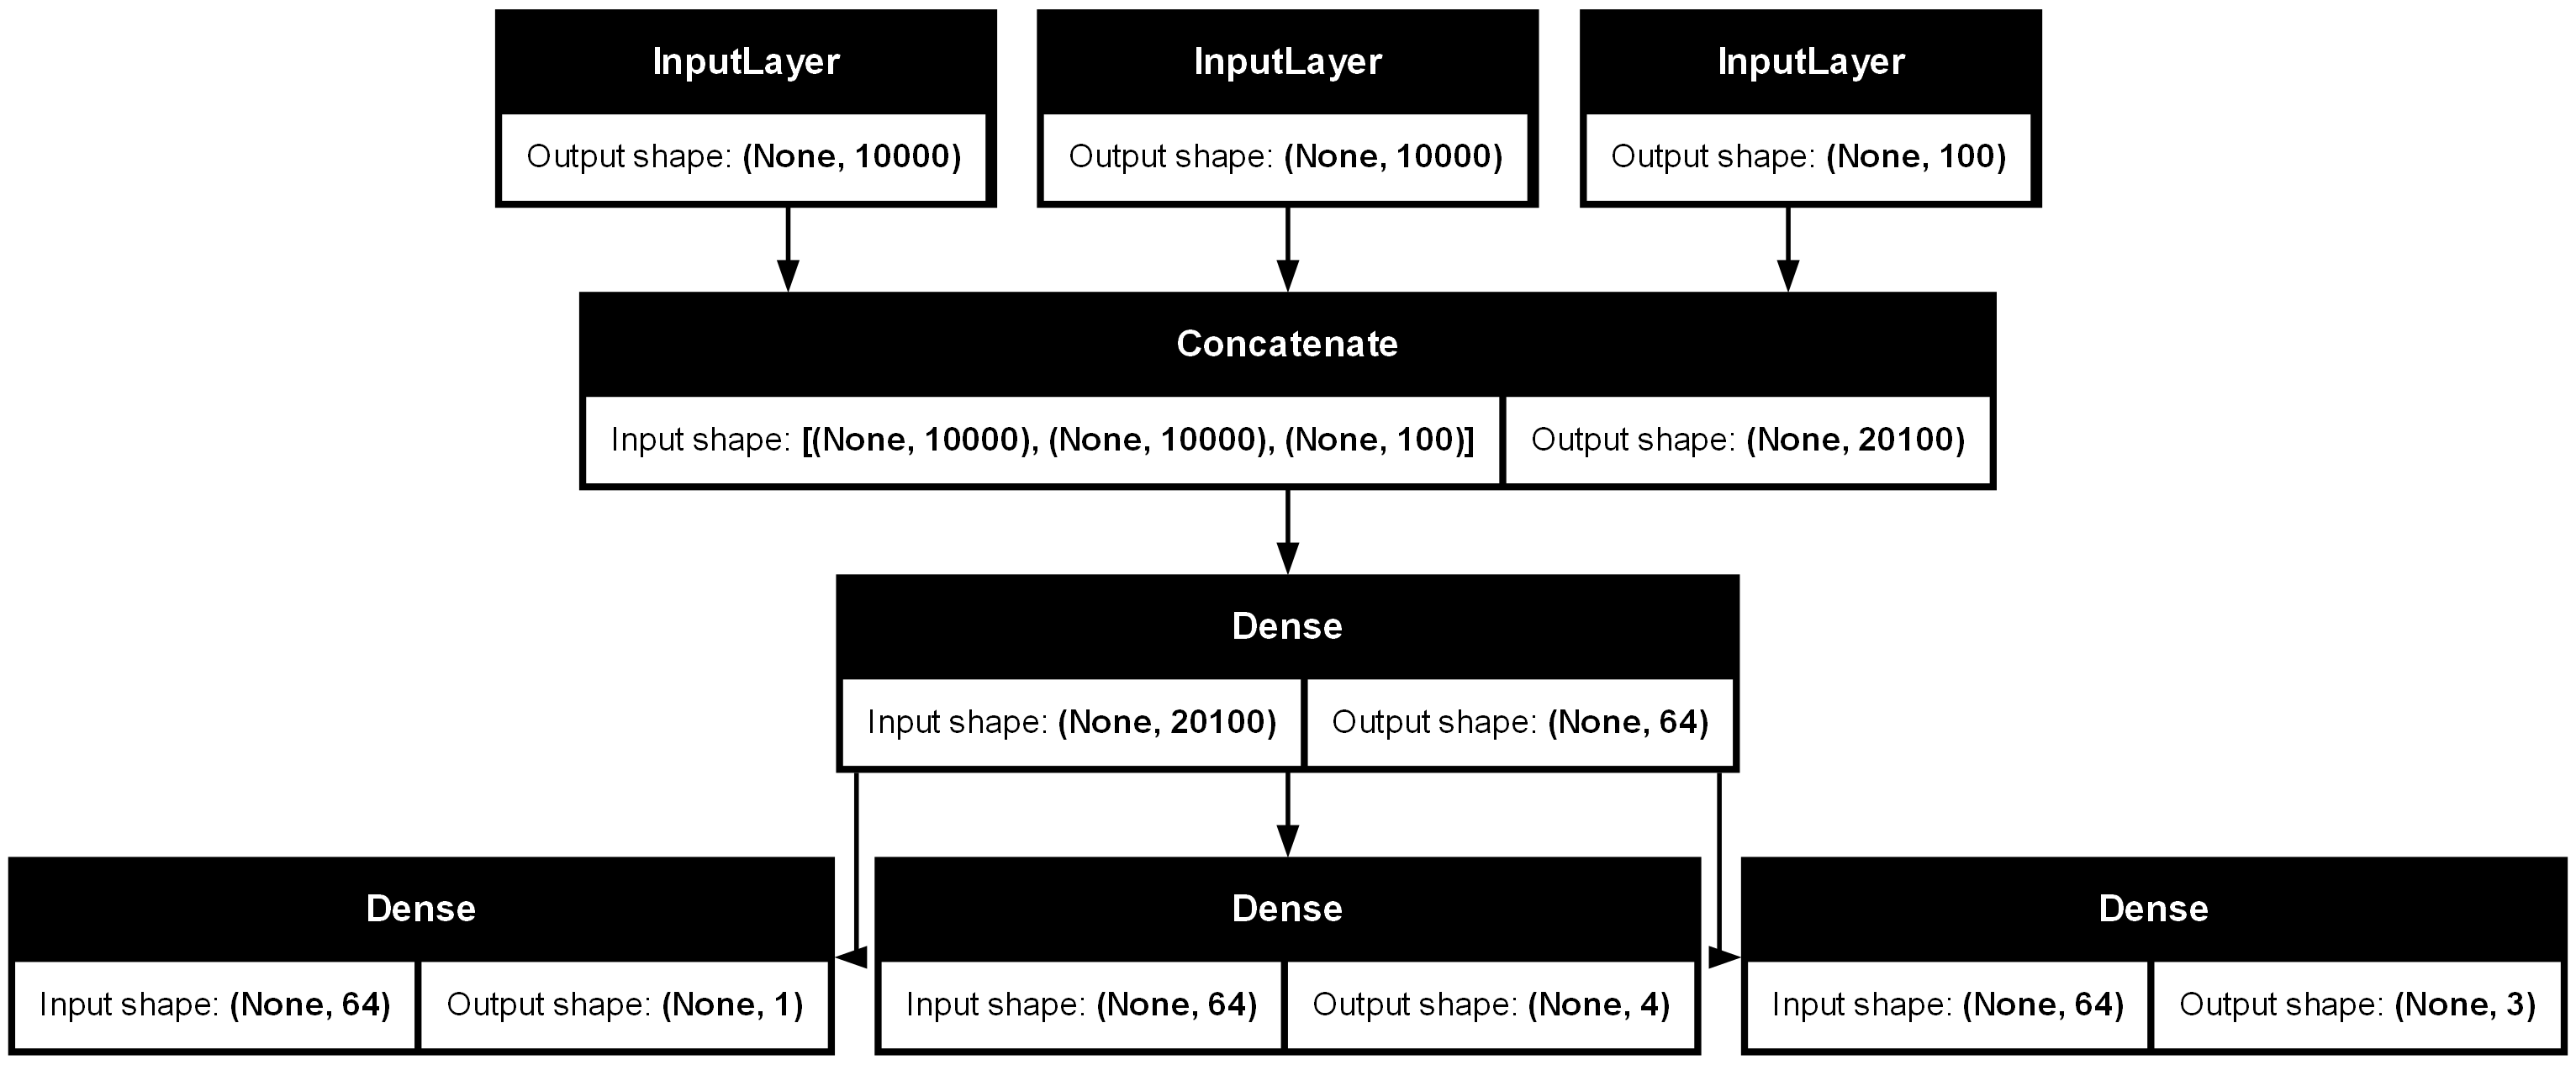

In [18]:
keras.utils.plot_model(new_model, "subclass_ticket_classifier.png", show_shapes=True)

In [19]:
# subclass는 유연하지만, 모델의 구조를 쉽게 이해하기 어려울 수 있음
# ex) 모델의 구조를 확인하려면 모델 인스턴스를 만들어야 함. summary() 메서드를 사용할 수 없음
# plot_model() 함수를 사용하면 모델 구조를 시각화할 수 없음?

# 여러 방식 혼합

In [20]:
# 서브클래싱한 모델을 포함하는 함수형 모델 만들기

class Classifier(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        if num_classes == 2:
            num_units = 1
            activation = "sigmoid"
        else:
            num_units = num_classes
            activation = "softmax"
        self.dense = layers.Dense(num_units, activation=activation)

    def call(self, inputs):
        return self.dense(inputs)

inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation="relu")(inputs)
outputs = Classifier(num_classes=10)(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [21]:
# 함수형 모델을 포함하는 서브클래싱 모델 만들기

inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation="sigmoid")(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)

class MyModel(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        self.dense = layers.Dense(64, activation="relu")
        self.classifier = binary_classifier

    def call(self, inputs):
        features = self.dense(inputs)
        return self.classifier(features)

model = MyModel()

# 표준 워크플로: compile(), fit(), evaluate(), predict() 대신 사용자 정의 함수 만들어 쓰기

In [3]:
# 예시 (아직 정의 함수 안 쓴 것)
from tensorflow.keras.datasets import mnist

def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs, outputs)
    return model

(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)

Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8671 - loss: 0.4420 - val_accuracy: 0.9561 - val_loss: 0.1449
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9514 - loss: 0.1657 - val_accuracy: 0.9674 - val_loss: 0.1189
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9607 - loss: 0.1378 - val_accuracy: 0.9728 - val_loss: 0.0980
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - accuracy: 0.9685 - loss: 0.1092
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step


In [27]:
# Metric 클래스를 상속하여 사용자 정의 지표 구현하기

import tensorflow as tf

class RootMeanSquaredError(keras.metrics.Metric): # keras.metrics.Metric 클래스를 상속 받아야 함 

    def __init__(self, name="rmse", **kwargs):
        super().__init__(name=name, **kwargs)
        self.mse_sum = self.add_weight(name="mse_sum", initializer="zeros")
        self.total_samples = self.add_weight(
            name="total_samples", initializer="zeros", dtype="int32")

    def update_state(self, y_true, y_pred, sample_weight=None): # 역전파로 업데이트 되지 않으므로 update_state 메서드를 구현해야 함? 
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
        mse = tf.reduce_sum(tf.square(y_true - y_pred))
        self.mse_sum.assign_add(mse)
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)

    def result(self): # 현재 지표 값을 반환 
        return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))

    def reset_state(self): # 객체를 생성하지 않고 상태를 초기화하는 방법을 제공해야 함 (지표 객체 하나를 서로 다른 훈련에 반복해서 사용하거나, 훈련과 평가에 모두 사용 가능) 
        self.mse_sum.assign(0.)
        self.total_samples.assign(0)

In [25]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy", RootMeanSquaredError()])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)

Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8642 - loss: 0.4497 - rmse: 0.4402 - val_accuracy: 0.9575 - val_loss: 0.1466 - val_rmse: 0.2552
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9512 - loss: 0.1678 - rmse: 0.2738 - val_accuracy: 0.9690 - val_loss: 0.1083 - val_rmse: 0.2165
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9641 - loss: 0.1274 - rmse: 0.2357 - val_accuracy: 0.9725 - val_loss: 0.1021 - val_rmse: 0.2066
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - accuracy: 0.9697 - loss: 0.1111 - rmse: 0.2184


In [37]:
# callback은 model.fit 과정에서 모델의 훈련을 제어하거나 모니터링하기 위해 사용되는 객체? 함수들인거 같음
# ex) 모델 체크포인트 저장, 조기 종료, 텐서보드 로그 기록 + 시각화 , 훈련하는 동안 하이퍼 파라미터 (학습률 등) 동적 조정 등
# keras.callbacks.ModelCheckpoint, keras.callbacks.EarlyStopping, keras.callbacks.TensorBoard, kakas.callbacks.LearningRateScheduler, keras.callbacks.CSVLogger 등이 있음
# callback은 keras.callbacks.Callback 클래스를 상속하여 사용자 정의 콜백을 만들 수 있음

# EarlyStopping 콜백과 ModelCheckpoint 콜백
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=2,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="checkpoint_path.keras",
        monitor="val_loss",
        save_best_only=True,
    )
]
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=callbacks_list,
          validation_data=(val_images, val_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8617 - loss: 0.4604 - val_accuracy: 0.9577 - val_loss: 0.1408
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9518 - loss: 0.1682 - val_accuracy: 0.9693 - val_loss: 0.1118
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9653 - loss: 0.1276 - val_accuracy: 0.9712 - val_loss: 0.1048
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9679 - loss: 0.1166 - val_accuracy: 0.9732 - val_loss: 0.1025
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9721 - loss: 0.1010 - val_accuracy: 0.9748 - val_loss: 0.0990
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9734 - loss: 0.0970 - val_accuracy: 0.9748 - val_loss: 0.1044
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9761 - loss: 0.0871 - val_accuracy: 0.9778 - val_loss: 0.0975
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9781 - loss: 0.0782 - 

In [36]:
# 만들어진 모델을 불러오기 ? 에러는 이해안되는데 버전 문제일 수 있을 것 같음 
model = keras.models.load_model("checkpoint_path.keras")

ValueError: A total of 1 objects could not be loaded. Example error message for object <keras.src.optimizers.rmsprop.RMSprop object at 0x0000024C85F2E0C0>:

'Unable to synchronously open object (unable to determine object type)'

List of objects that could not be loaded:
[<keras.src.optimizers.rmsprop.RMSprop object at 0x0000024C85F2E0C0>]

In [38]:
# Callback 클래스를 상속하여 사용자 정의 콜백 만들기
# 내장 콜백에서 제공하지 않는 기능을 추가하거나, 훈련 중에 추가적인 동작을 수행하려는 경우 사용
# on_epoch_begin : 에포크가 시작될때 호출
# on_epoch_end : 에포크가 끝날 때 호출
# on_batch_begin : 배치 처리가 시작하기 전에 호출 
# on_batch_end : 배치 처리가 끝난 후에 호출
# on_train_begin : 훈련이 시작할때 호출
# on_train_end : 훈련이 끝날때 호출 
from matplotlib import pyplot as plt

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.per_batch_losses = []

    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get("loss"))

    def on_epoch_end(self, epoch, logs):
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses,
                 label="Training loss for each batch")
        plt.xlabel(f"Batch (epoch {epoch})")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f"plot_at_epoch_{epoch}")
        self.per_batch_losses = []


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8639 - loss: 0.4503 - val_accuracy: 0.9581 - val_loss: 0.1418
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9507 - loss: 0.1641 - val_accuracy: 0.9673 - val_loss: 0.1136
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9618 - loss: 0.1311 - val_accuracy: 0.9728 - val_loss: 0.0979
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9689 - loss: 0.1097 - val_accuracy: 0.9754 - val_loss: 0.0946
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9713 - loss: 0.0987 - val_accuracy: 0.9759 - val_loss: 0.0952
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9758 - loss: 0.0886 - val_accuracy: 0.9773 - val_loss: 0.0903
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9764 - loss: 0.0904 - val_accuracy: 0.9791 - val_loss: 0.0876
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9774 - loss: 0.0821 - 

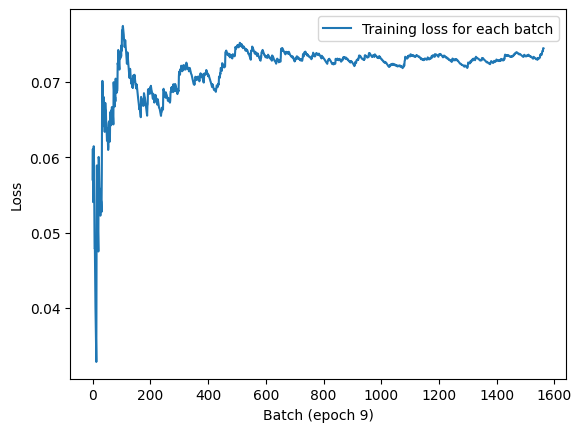

In [33]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=[LossHistory()],
          validation_data=(val_images, val_labels))

In [11]:
# 텐서보드를 사용한 모니터링과 시각화 예시
# 텐서보드 : https://www.tensorflow.org/tensorboard?hl=ko
import os

model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# 로그 디렉토리 생성
log_dir = "./tb_logs"
if not os.path.exists(log_dir):
    os.makedirs(log_dir)

# TensorBoard 콜백 정의
tensorboard = keras.callbacks.TensorBoard(
    log_dir=log_dir,
)

model.fit(train_images, train_labels,
          epochs=10,
          validation_data=(val_images, val_labels),
          callbacks=[tensorboard])

FailedPreconditionError: {{function_node __wrapped__CreateSummaryFileWriter_device_/job:localhost/replica:0/task:0/device:CPU:0}} ./tb_logs is not a directory [Op:CreateSummaryFileWriter] name: 

In [6]:
%load_ext tensorboard
%tensorboard --logdir ./tb_logs

In [15]:
import tensorflow as tf
from tensorflow import keras
import os

# 모델 정의 함수 (예: MNIST 모델)
def get_mnist_model():
    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10, activation='softmax')
    ])
    return model

# 데이터셋 로드 및 전처리 (예: MNIST 데이터셋)
(train_images, train_labels), (val_images, val_labels) = keras.datasets.mnist.load_data()
train_images = train_images / 255.0
val_images = val_images / 255.0

# 절대 경로 사용하여 로그 디렉토리 생성
log_dir = os.path.join(os.getcwd(), "tb_logs")
if not os.path.exists(log_dir):
    os.makedirs(log_dir)

# TensorBoard 콜백 정의
tensorboard = keras.callbacks.TensorBoard(
    log_dir=log_dir,
)

# 모델 컴파일 및 훈련
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(train_images, train_labels,
          epochs=10,
          validation_data=(val_images, val_labels),
          callbacks=[tensorboard])


FailedPreconditionError: {{function_node __wrapped__CreateSummaryFileWriter_device_/job:localhost/replica:0/task:0/device:CPU:0}} c:\Users\saink\PycharmProjects\aiffel\day14_케창딥7장\tb_logs is not a directory [Op:CreateSummaryFileWriter] name: 